In [247]:
from sklearn import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Understanding the data

In [248]:
dataframe = pd.read_csv('math_outputs.csv').drop(['Unnamed: 0'], axis='columns')

/tmp/ipykernel_9376/3492911729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method="pearson")
/tmp/ipykernel_9376/3492911729.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')


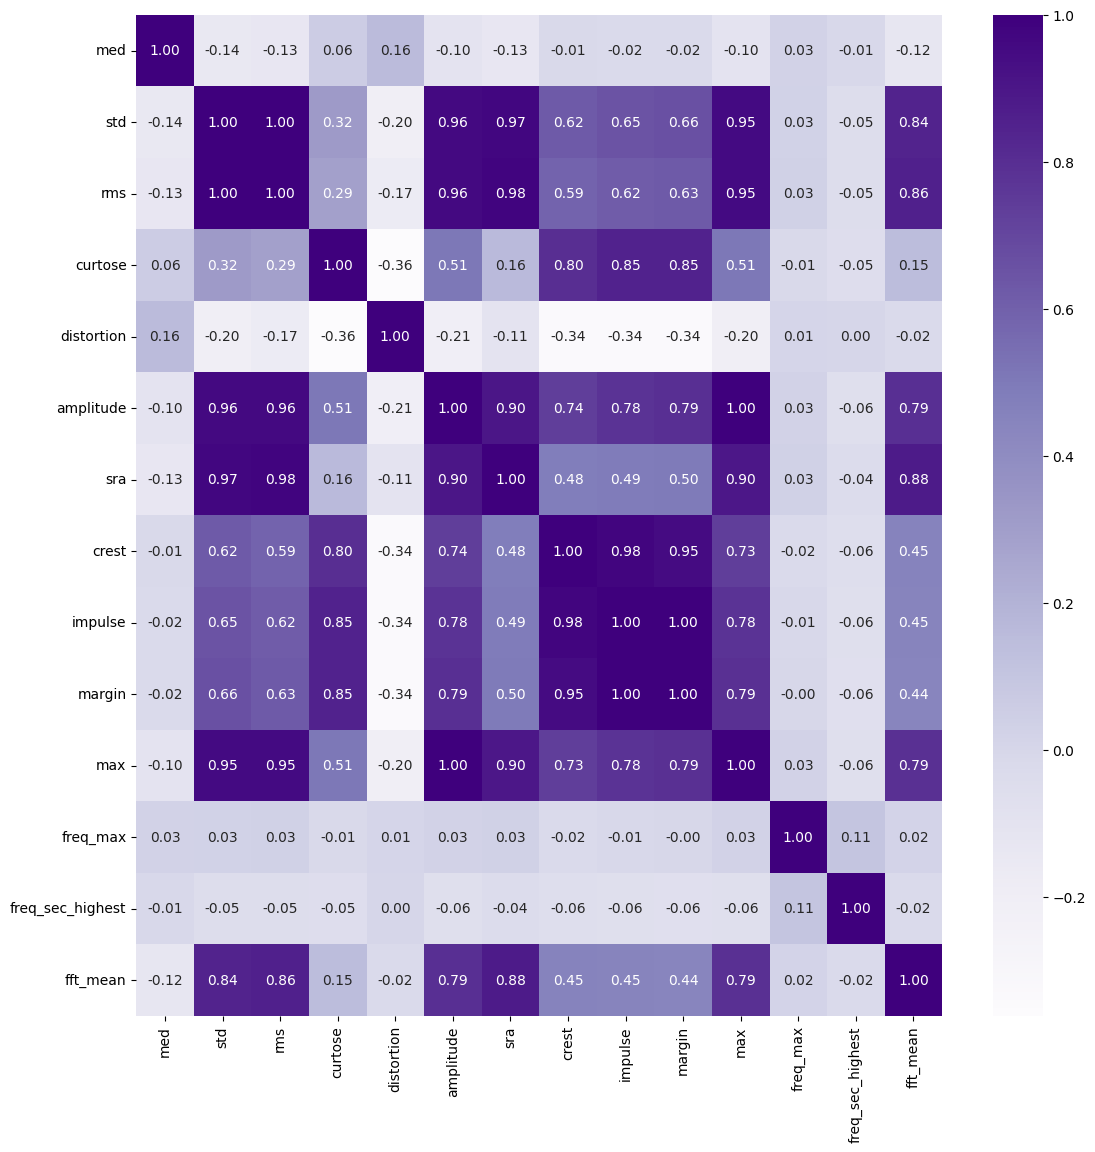

In [249]:
dataframe.corr(method="pearson")

plt.figure(figsize=(13,13))
sns.heatmap(dataframe.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')
plt.show()

<AxesSubplot: xlabel='chatter_presence', ylabel='freq_sec_highest'>

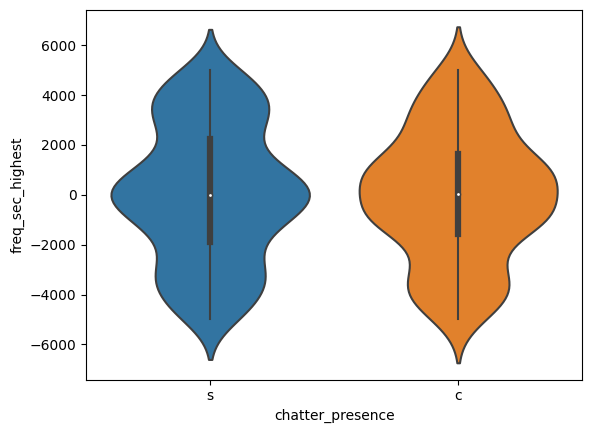

In [250]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# Treating data

In [251]:
dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
dataframe.head(1)


,Experiment,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,chatter_presence_s
0,s_320_045_split_1,0.005482,0.002285,0.00594,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542,1


In [252]:
dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
dataframe.dtypes

Experiment             object
med                   float64
std                   float64
rms                   float64
curtose               float64
distortion            float64
amplitude             float64
sra                   float64
crest                 float64
impulse               float64
margin                float64
max                   float64
freq_max              float64
freq_sec_highest      float64
fft_mean              float64
chatter_presence_s       bool
dtype: object

In [253]:
y = dataframe['chatter_presence_s']
x = dataframe.copy().drop(['Experiment', 'chatter_presence_s'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# Models

In [254]:
lreg = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

## Linear Regression

In [255]:
lreg.fit(x_train, y_train)

LinearRegression()

In [256]:
lreg_pred = lreg.predict(x_test)

In [257]:
r2_linear = r2_score(y_test, lreg_pred)
r2_linear

0.625801209798448

In [258]:
mae_linear = mean_absolute_error(y_test, lreg_pred)
mae_linear

0.2020612730490468

## Random Forest


In [259]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [260]:
rf_pred = rf.predict(x_test)

In [261]:
r2_rf = r2_score(y_test, rf_pred)
r2_rf

In [262]:
mae_rf = mean_absolute_error(y_test, rf_pred)
mae_rf

### GridSearchCV

In [337]:
# params_rf = { 
#     'n_estimators': [5, 10, 15, 30, 40, 50],
#     'max_features': ['auto'],
#     'max_depth' : [4,5,6,7,8, 9, 10, 11],
#     "min_samples_split": [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 7, 9, 11],
#     'criterion' :['poisson', 'gini', 'squared_error', 'absolute_error', 'friedman_mse']
# }

In [338]:
# CV_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5)

In [339]:
# CV_rf.fit(x_train, y_train)
# clear_output()

In [340]:
# CV_rf.best_params_

'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30

In [341]:
params_rf_grid = {'criterion': ['squared_error'],
 'max_depth': [5],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [30]}

In [342]:
CV_rf_grid = GridSearchCV(estimator=rf, param_grid=params_rf_grid, cv= 5)

In [343]:
CV_rf_grid.fit(x_train, y_train)
clear_output()

In [344]:
rf_pred_grid = CV_rf_grid.best_estimator_.predict(x_test)

In [345]:
r2_rf_grid = r2_score(y_test, rf_pred_grid)
r2_rf_grid

0.7866083056601889

In [346]:
mae_rf_grid = mean_absolute_error(y_test, rf_pred_grid)
mae_rf_grid

0.09812318340500915

## Decision Tree

In [273]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [274]:
dt_pred = dt.predict(x_test)

In [275]:
r2_dt = r2_score(y_test, dt_pred)
r2_dt

In [276]:
mae_dt = mean_absolute_error(y_test, dt_pred)
mae_dt

### GridSearchCV

In [323]:
params = {
    'criterion': ['mse', 'poisson', 'mae'],
    'max_depth': [3,5,8,15,30,40,50,60]
}

In [324]:
dt_grid = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
dt_grid.get_params().keys()
dt_grid.fit(x_train, y_train)
clear_output()
dt_grid.best_estimator_ 

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [325]:
dt_grid.best_estimator_.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [326]:
dt_pred_grid = dt_grid.best_estimator_.predict(x_test)

In [327]:
r2_dt_grid = r2_score(y_test, dt_pred_grid)
r2_dt_grid

0.7312921555089391

In [328]:
mae_dt_grid = mean_absolute_error(y_test, dt_pred_grid)
mae_dt_grid

0.11181061515923359

## SVM

### Linear

In [283]:
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [284]:
svm_linear_pred = classifier_linear.predict(x_test)

In [285]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)
acc_svm_linear

0.8809523809523809

#### GridSearchCV Linear SVM


In [286]:
# params_svm_linear = {'C': [1, 10], # 0.1, , 100, 1000
#               'gamma': [1, 0.1, 0.01], # , 0.001, 0.0001
#               'kernel': ['linear']} 

In [287]:
# classifier_linear_grid = GridSearchCV(classifier_linear, params_svm_linear, refit = True, verbose = 3)


In [288]:
# classifier_linear_grid.fit(x_train, y_train)
# clear_output()

In [289]:
# pred_svm_linear_grid = classifier_linear_grid.best_estimator_.predict(x_test)

In [290]:
# acc_svm_linear_grid = accuracy_score(y_test, pred_svm_linear_grid)
# acc_svm_linear_grid

### rbf

In [291]:
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [292]:
svm_rbf_pred = classifier_rbf.predict(x_test)

In [293]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)
acc_svm_rbf

#### GridSearchCV rbf

In [294]:
# params_svm_rbf = {'C': [1, 10], # 0.1, , 100, 1000
#               'gamma': [1, 0.1, 0.01], # , 0.001, 0.0001
#               'kernel': ['rbf']} 

In [295]:
# classifier_rbf_grid = GridSearchCV(classifier_rbf, params_svm_rbf, refit = True, verbose = 3)


In [296]:
# classifier_rbf_grid.fit(x_train, y_train)
# clear_output()

In [297]:
# pred_svm_rbf_grid = classifier_rbf_grid.predict(x_test)

In [298]:
# acc_svm_rbf_grid = accuracy_score(y_test, pred_svm_linear_grid)
# acc_svm_rbf_grid

#### GridSearchCV rbf

# Model results

In [347]:
model_results = pd.DataFrame(
    np.array([[r2_linear, r2_rf, r2_rf_grid, r2_dt, r2_dt_grid], 
    [mae_linear, mae_rf, mae_rf_grid, mae_dt, mae_dt_grid]]), 
    columns=['linear_regressor', 'random_forest', 'random_forest_grid', 'decision_tree', 'decision_tree_grid'],
    index=['r2_score', 'mean_absolute_error']
)
# svm_results = pd.DataFrame(
#     np.array([[acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid]]),
#     columns=['svm_linear', 'svm_linear_grid', 'svm_rbf', 'svm_rbf_grid'],
#     index=['accuracy_score']
# )

svm_results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_rbf]]),
    columns=['svm_linear', 'svm_rbf'],
    index=['accuracy_score']
)

In [348]:
model_results.round(4) 

,linear_regressor,random_forest,random_forest_grid,decision_tree,decision_tree_grid
r2_score,0.6258,0.7842,0.7866,0.5722,0.7313
mean_absolute_error,0.2021,0.1002,0.0981,0.0873,0.1118


In [349]:
svm_results.round(4)

,svm_linear,svm_rbf
accuracy_score,0.881,0.7063
